# Read me

The following steps are performed to remove erroneous data, profiles and points. 


Temperature: 

Using the glider tool wrapper function from gt.calc_physics provided by the GlideTools library (“GlideTools Documentation”,2023) outliers in conservative temperature are removed with an IQR of 2.5. Spikes are removed with a rolling median (spike window size = 5) and the dataset is smoothened with a Savitzky-Golay filter (window = 11, order = 2).

Salinity:

In the absolute salinity glider transect three fresh water spikes are found near the thermocline. The spikes are found during climbs at locations where the conductivity and temperature profiles are not aligned and the vertical speed of the glider drops to significant lower values. The spikes consist of numerous measurements points and can therefore not be removed with the wrapper function. The absolute salinity spikes in climbs 22.5, 26.5 and 28.5 are removed manually based on a threshold value of thevertical speed which are subsequently set to 13, 10 and 11 m/s. 

The wrapper function is used to remove outliers with an IQR of 3. Spikes are removed with a rolling median (spike window = 5) and the dataset is smoothed with a Savitzky-Golay filter (window size = 11, order = 2).

Oxygen:

Oxygen concentrations with a saturation value above 110% and an optode temperature above 40 C◦are removed to from the
dataset to eliminate outliers. Subsequently outliers with an IQR of 2.5 are removed, spikes are removed using a rolling median (spike window size = 5) and the Oxygen dataset is smoothed with a Savitzky-Golay filter (window = 11, order = 2). 

# Packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)
import pandas as pd
import csv
import sys
import array
import xarray as xr
import cmocean.cm as cmocean
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32
#topo_adjust to topo wi
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import pathlib
from pathlib import Path
import os
import netCDF4
from netCDF4 import Dataset as nc
import glob
from glob import glob
import glidertools as gt
import gsw

# Load dataset 


In [2]:
filenames = 'C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sg675/p6750*.nc'



gt.load.seaglider_show_variables(filenames)

information is based on file: C:/Users/rensk/OneDrive/Documenten/Physical Oceanography Master GU/mast thesis/Data/sg675\p6750150.nc


,dims,units,comment
name,,,
gc_data_pts,gc_event,1,
gc_depth,gc_event,meters,
gc_end_secs,gc_event,seconds since 1970-1-1 00:00:00,End of GC time in GMT epoch format
gc_flags,gc_event,,
gc_ob_vertv,gc_event,cm/s,
gc_pitch_ad,gc_event,1,
gc_pitch_ad_start,gc_event,1,
gc_pitch_ctl,gc_event,cm,
gc_pitch_errors,gc_event,1,


#### list of relevant variables

In [3]:
names = [
    'horz_speed_gsm',
    'horz_speed',
    'time',
    'ctd_depth',
    'ctd_time',
    'ctd_pressure',
    'aanderaa4831_dissolved_oxygen',
    'temperature',
    'salinity',
    'latitude',
    'longitude',
    'density_insitu',
    'absolute_salinity',
    'conservative_temperature',
    'dissolved_oxygen_sat',
    'eng_aa4831_O2',
    'density',
    'dissolved_oxygen_sat',
    'salinity_qc',
    'conductivity_raw',
    'temperature_raw',
    'eng_aa4831_Temp',
    'theta',
    'vert_speed',
    'conductivity',
    'delta_time_s',
    'wlbb2fl_sig470nm_adjusted',
    'wlbb2fl_sig700nm_adjusted',
    'wlbb2fl_sig695nm_adjusted',
    'north_displacement', 
    'east_displacement',
    'delta_time_s',
    'north_displacement_gsm',
    'east_displacement_gsm',
    'vert_speed_gsm',
]

#### store dataset with list of revelant variables 

In [4]:
# Remove duplicates by converting the list to a set and back to a list
names = list(names)

ds_dict = gt.load.seaglider_basestation_netCDFs(
    filenames, names,
    return_merged=False,
    keep_global_attrs=False
)


DIMENSION: sg_data_point
{north_displacement_gsm, ctd_depth, east_displacement_gsm, eng_aa4831_Temp, density_insitu, vert_speed_gsm, temperature, eng_aa4831_O2, horz_speed_gsm, conductivity, ctd_pressure, ctd_time, north_displacement, salinity_qc, delta_time_s, time, east_displacement, theta, wlbb2fl_sig695nm_adjusted, conservative_temperature, vert_speed, longitude, horz_speed, wlbb2fl_sig470nm_adjusted, absolute_salinity, latitude, salinity, aanderaa4831_dissolved_oxygen, wlbb2fl_sig700nm_adjusted, conductivity_raw, dissolved_oxygen_sat, density, temperature_raw}


100%|██████████| 296/296 [00:17<00:00, 16.79it/s]


In [ ]:
ds_work = ds_dict['sg_data_point']

In [ ]:
ds_work.to_netcdf('ds_work.nc')


#### Open dataset

In [7]:
ds_work = xr.open_dataset('ds_work.nc')

In [8]:
ds_work

<xarray.Dataset>
Dimensions:                        (sg_data_point: 1011760)
Coordinates:
    longitude                      (sg_data_point) float64 ...
    latitude                       (sg_data_point) float64 ...
    ctd_depth                      (sg_data_point) float64 ...
    ctd_time_dt64                  (sg_data_point) datetime64[ns] ...
Dimensions without coordinates: sg_data_point
Data variables: (12/31)
    time_dt64                      (sg_data_point) datetime64[ns] ...
    conductivity                   (sg_data_point) float64 ...
    temperature                    (sg_data_point) float64 ...
    wlbb2fl_sig470nm_adjusted      (sg_data_point) float64 ...
    ctd_pressure                   (sg_data_point) float64 ...
    east_displacement_gsm          (sg_data_point) float64 ...
    ...                             ...
    eng_aa4831_Temp                (sg_data_point) float64 ...
    conservative_temperature       (sg_data_point) float64 ...
    horz_speed_gsm                 (sg_data_point) float64 ...
    north_displacement             (sg_data_point) float64 ...
    density                        (sg_data_point) float64 ...
    dives                          (sg_data_point) float64 ...
Attributes:
    date_created:             2024-10-01 12:39:26
    number_of_dives:          297.0
    files:                    ['sg675\\p6750001.nc', 'sg675\\p6750002.nc', 's...
    time_coverage_start:      2023-03-22 08:33:43
    time_coverage_end:        2023-05-23 14:35:58
    geospatial_vertical_min:  -0.4099847480673791
    geospatial_vertical_max:  997.9714500140016
    geospatial_lat_min:       -39.0867180977343
    geospatial_lat_max:       -34.175015292337385
    geospatial_lon_min:       16.126584386547684
    geospatial_lon_max:       18.36846162288576
    processing:               [2024-10-01 12:39:26] imported data with Glider...

# QC of unrealistic values

The dissolved oxygen concentration is calculated based on the Seabird optode temperature. Dissolved oxygen with unrealistic optode temperature values and unrealistic saturation values have been removed from the dataset.

In [9]:
ds_work['aanderaa4831_dissolved_oxygen']  = ds_work.aanderaa4831_dissolved_oxygen.where(ds_work.eng_aa4831_Temp < 40)
ds_work['aanderaa4831_dissolved_oxygen']  = ds_work.aanderaa4831_dissolved_oxygen.where((ds_work.aanderaa4831_dissolved_oxygen / ds_work.dissolved_oxygen_sat) * 100 <110)

# Gridding

In [10]:
depth = np.arange(-0.25, 1000.75, 0.5)

In [11]:
# grid
latitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.latitude, bins=depth)
longitude = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.longitude, bins=depth)
ctd_pressure = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.ctd_pressure, bins=depth)
o2 = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.aanderaa4831_dissolved_oxygen, bins=depth)
salinity = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.absolute_salinity, bins=depth)
temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.conservative_temperature, bins=depth)
pottemp = temp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.theta, bins=depth)
optodetemp = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.eng_aa4831_Temp, bins=depth)
vert_speed = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.vert_speed, bins= depth)
conductivity = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.conductivity, bins= depth)
density = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ds_work.density_insitu, bins = depth)


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# Glidertool QC and filters

Temperature QC using the glidertool available on https://glidertools.readthedocs.io/en/latest/quality_control.html


Physics Variable:
	Removing outliers with IQR * 2.5: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


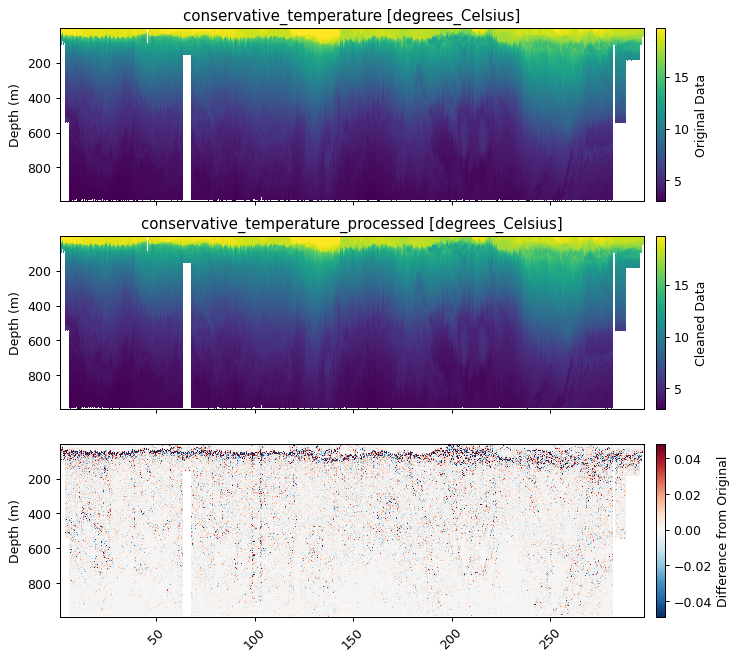

In [12]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

temp_f = gt.calc_physics(ds_work.conservative_temperature, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.conservative_temperature, ax=ax[0])
gt.plot(x, y, temp_f, ax=ax[1])
gt.plot(x, y, temp_f - ds_work.conservative_temperature, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()


In [13]:
temp_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, temp_f, bins=depth)

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


### locate freshwater spikes

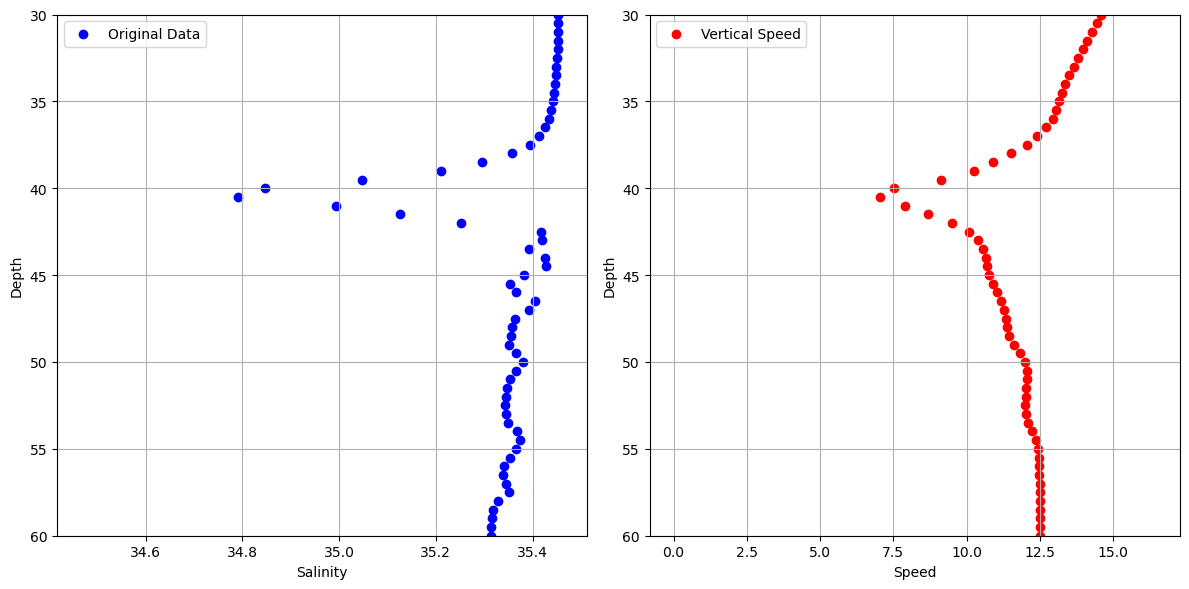

In [14]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=26.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=26.5), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


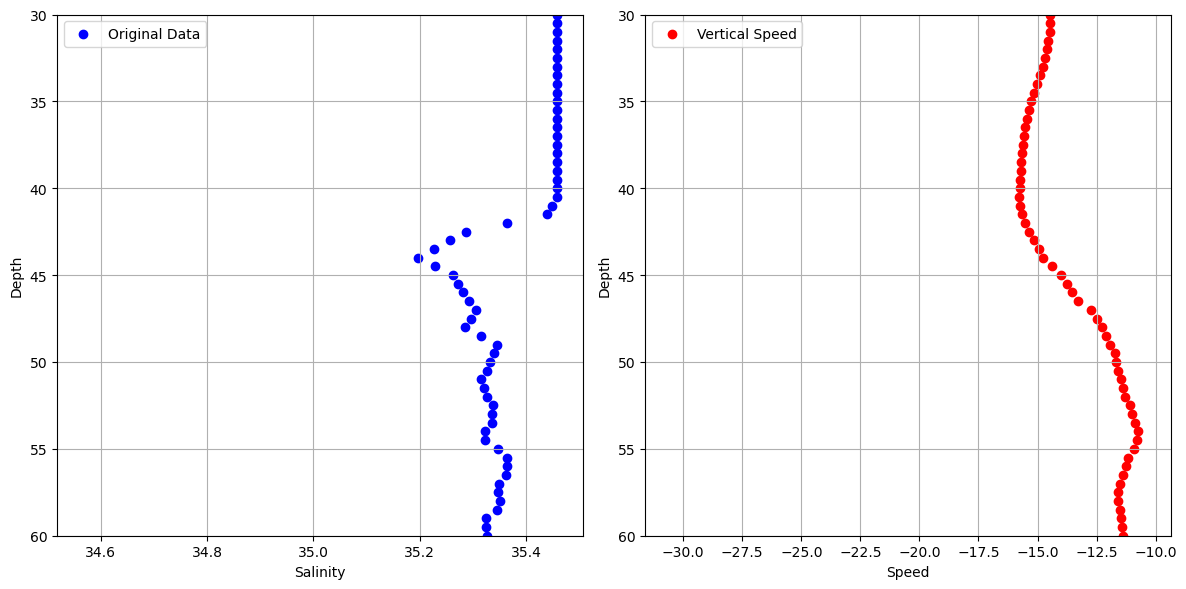

In [15]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=27), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=27), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()

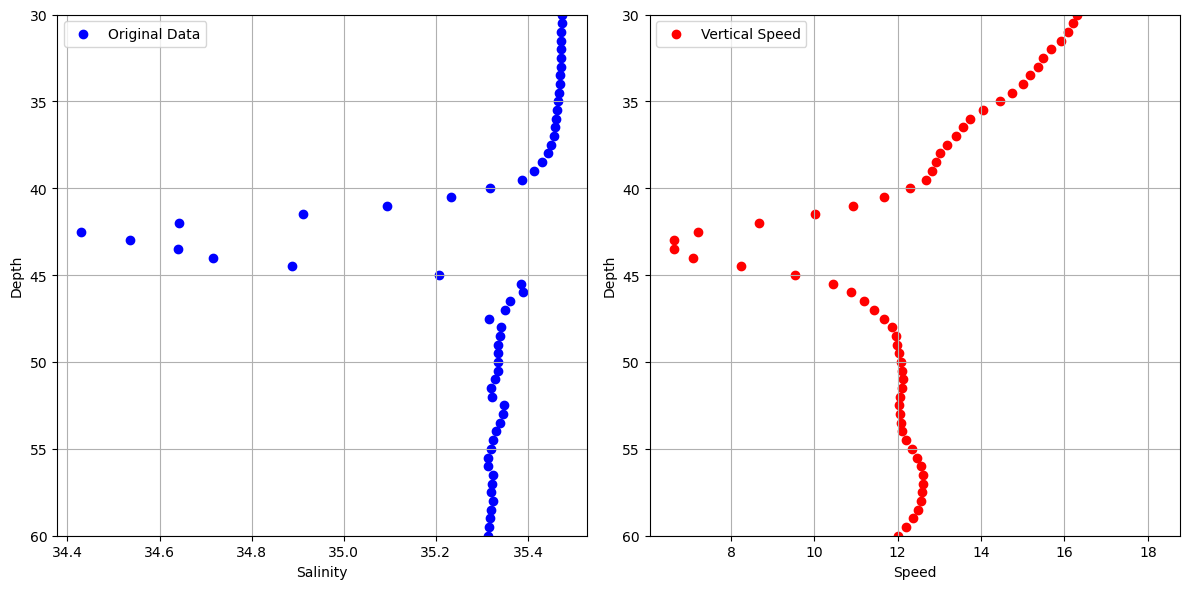

In [16]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=28.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(vert_speed.sel(dives=28.5), vert_speed.ctd_depth, label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


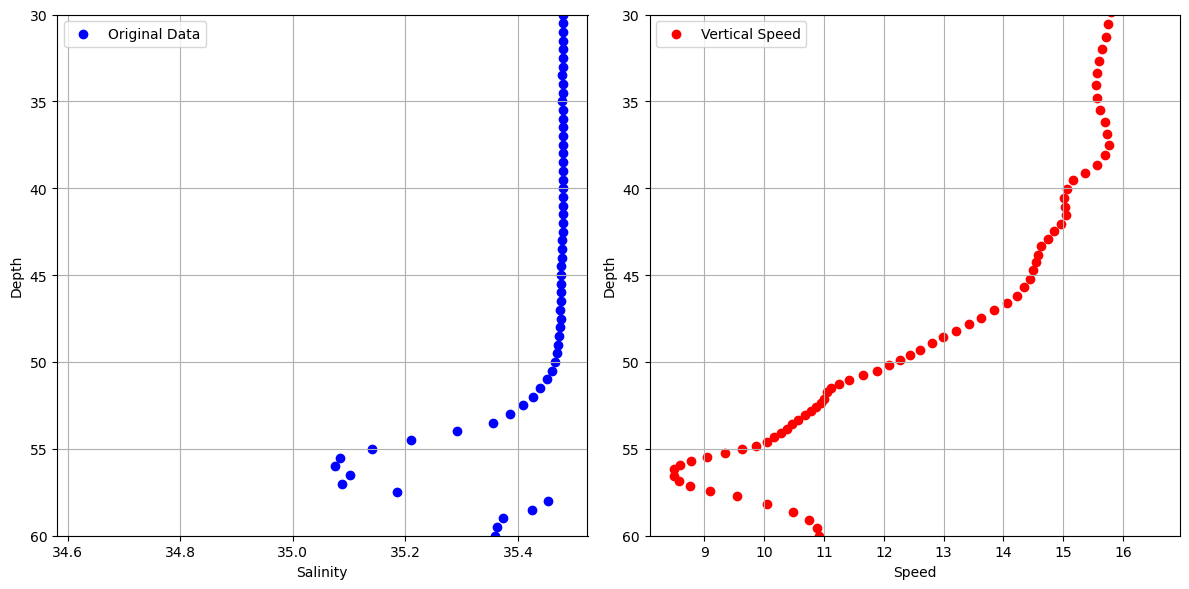

In [17]:
# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original salinity data on the first subplot
ax1.scatter(salinity.sel(dives=29.5), salinity.ctd_depth, label='Original Data', color='blue')
ax1.set_ylim(30, 60)  # Set y-axis limits for the original data
ax1.invert_yaxis()  # Invert the y-axis
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Depth')
ax1.grid()
ax1.legend()

# Plot the vertical speed data on the second subplot
ax2.scatter(ds_work.vert_speed.where(ds_work.dives==29.5), ds_work.ctd_depth,label='Vertical Speed', color='red')
ax2.set_ylim(30, 60)  # Set y-axis limits for the vertical speed data
ax2.invert_yaxis()  # Invert the y-axis
ax2.set_xlabel('Speed')
ax2.set_ylabel('Depth')
ax2.grid()
ax2.legend()

# Show the plot
plt.tight_layout()
plt.show()


# remove freshwater spikes

In [18]:
# Find the indices where vert_speed is positive and less than 10 for dive 26.5
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 10) &(ds_work.ctd_depth >= 35) & (ds_work.ctd_depth <= 45) & (ds_work.dives==26.5)



In [19]:
sal = ds_work['absolute_salinity'].where(~positive_speed_indices, np.nan)

In [20]:
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 13) &(ds_work.ctd_depth >= 40) & (ds_work.ctd_depth <= 55) & (ds_work.dives==22.5)

In [21]:
sal = sal.where(~positive_speed_indices, np.nan)

In [22]:
positive_speed_indices = (ds_work.vert_speed > 0) & (ds_work.vert_speed < 11) &(ds_work.ctd_depth >= 35) & (ds_work.ctd_depth <= 50) & (ds_work.dives==28.5)

In [23]:
sal = sal.where(~positive_speed_indices, np.nan)

Salinity QC using the glidertool available on https://glidertools.readthedocs.io/en/latest/quality_control.html


Physics Variable:
	Removing outliers with IQR * 3: 0 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=3)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


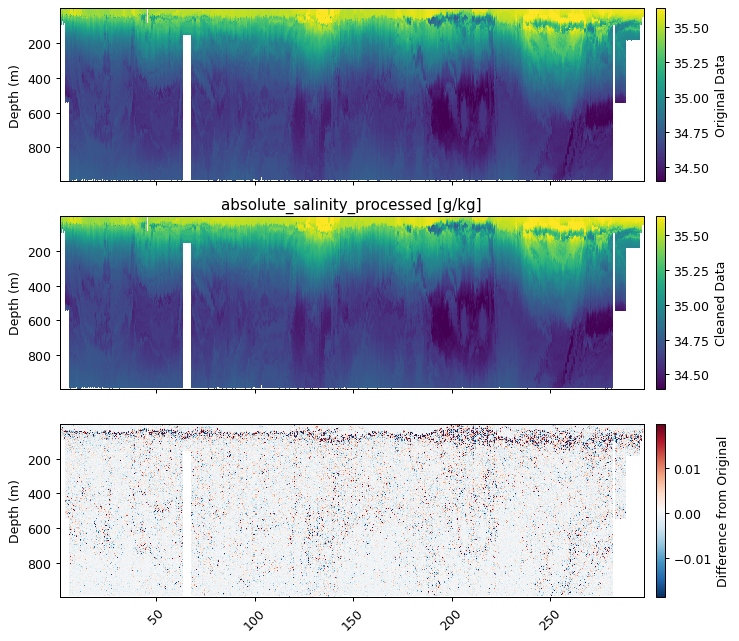

In [24]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

sal_f = gt.calc_physics(sal, x, y, iqr=3,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)

#sal_f, salt_spike = gt.cleaning.despike(salt, window_size=3, spike_method='median')
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, sal, ax=ax[0])
plt.xlim(26,27)
gt.plot(x, y, sal_f, ax=ax[1])
plt.xlim(26,27)
gt.plot(x, y, sal_f - sal, cmap=cmap, ax=ax[2])
#gt.plot(x, y, salt_spike - salt, cmap=cmap, ax = ax[3])
[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
#plt.xlim(20,30)
ax[1].cb.set_label('Cleaned Data')
#plt.xlim(20,30)
ax[2].cb.set_label('Difference from Original')
#plt.xlim(20,30)

plt.show()

In [25]:
sal_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, sal_f, bins=depth)

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


Oxygen QC using the glidertool available on https://glidertools.readthedocs.io/en/latest/quality_control.html


Physics Variable:
	Removing outliers with IQR * 2.5: 8 obs
	Removing spikes with rolling median (spike window=5)
	Removing horizontal outliers (fraction=0.2, multiplier=2.5)
	Smoothing with Savitzky-Golay filter (window=11, order=2)


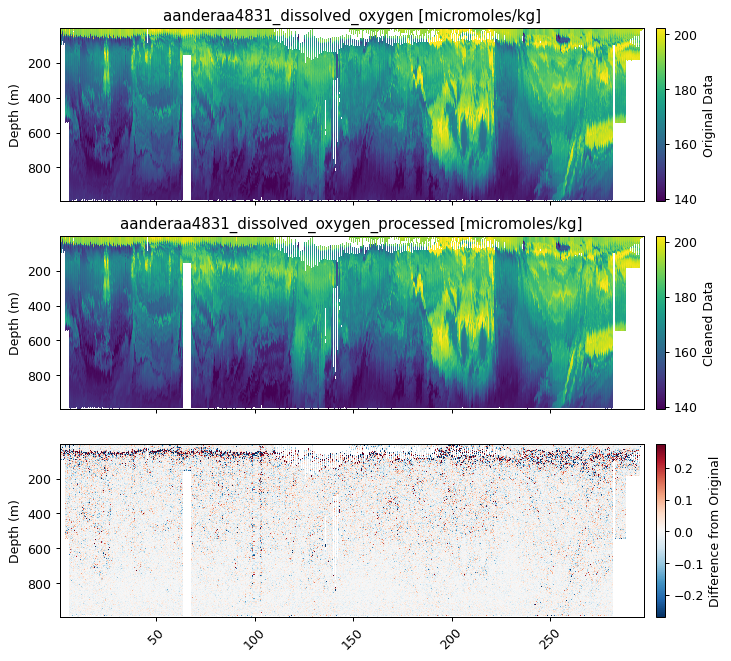

In [26]:
x = np.array(ds_work.dives)  # ensures these are arrays
y = np.array(ds_work.ctd_depth)

ox_f = gt.calc_physics(ds_work.aanderaa4831_dissolved_oxygen, x, y, iqr=2.5,
                            spike_window=5, spike_method='median',
                            mask_frac=0.2, 
                          savitzky_golay_window=11, savitzky_golay_order=2)
                       


# PLOTTING
fig, ax = plt.subplots(3, 1, figsize=[9, 8.5], sharex=True, dpi=90)
cmap = plt.get_cmap("RdBu_r")
gt.plot(x, y, ds_work.aanderaa4831_dissolved_oxygen, ax=ax[0])
gt.plot(x, y, ox_f, ax=ax[1])
gt.plot(x, y, ox_f - ds_work.aanderaa4831_dissolved_oxygen, cmap=cmap, ax=ax[2])

[a.set_xlabel('') for a in ax]

ax[0].cb.set_label('Original Data')
ax[1].cb.set_label('Cleaned Data')
ax[2].cb.set_label('Difference from Original')

plt.show()

In [27]:
ox_f_g = gt.grid_data(ds_work.dives, ds_work.ctd_depth, ox_f, bins=depth)

Mean bin size = 0.50
Mean depth binned (50 m) vertical sampling frequency = 0.53


C:\Users\rensk\anaconda3\Lib\site-packages\glidertools\helpers.py:42: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  arg_valu = str(locl[arg_name])


# Get distance relative to current

In [28]:

# Extract horz_speed DataArray from the Dataset
horz_speed = ds_work['horz_speed_gsm']

# Replace NaN values with 0
horz_speed = horz_speed.fillna(0)

# Convert the DataArray to a NumPy array to modify values
horz_speed_values = horz_speed

# Set the first value to 0
horz_speed_values[0] = 0

# Update subsequent values to be the average of the current and previous value
for i in range(1, len(horz_speed_values)):
    horz_speed_values[i] = (horz_speed_values[i] + horz_speed_values[i - 1]) / 2






In [29]:
distance = horz_speed_values*5/100000
distance

<xarray.DataArray 'horz_speed_gsm' (sg_data_point: 1011760)>
array([0.        , 0.00057535, 0.00087157, ..., 0.00106989, 0.00172239,
       0.00154248])
Coordinates:
    longitude      (sg_data_point) float64 17.32 17.32 17.32 ... 16.82 16.82
    latitude       (sg_data_point) float64 -37.52 -37.52 ... -34.18 -34.18
    ctd_depth      (sg_data_point) float64 0.3871 0.8966 ... 0.01038 -0.1323
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-03-22T08:33:43 ... 202...
Dimensions without coordinates: sg_data_point

In [30]:
tot_distance = np.cumsum(distance)
tot_distance

<xarray.DataArray 'horz_speed_gsm' (sg_data_point: 1011760)>
array([0.00000000e+00, 5.75353726e-04, 1.44692097e-03, ...,
       8.13256055e+02, 8.13257777e+02, 8.13259319e+02])
Coordinates:
    longitude      (sg_data_point) float64 17.32 17.32 17.32 ... 16.82 16.82
    latitude       (sg_data_point) float64 -37.52 -37.52 ... -34.18 -34.18
    ctd_depth      (sg_data_point) float64 0.3871 0.8966 ... 0.01038 -0.1323
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-03-22T08:33:43 ... 202...
Dimensions without coordinates: sg_data_point

In [33]:
ds_work


<xarray.Dataset>
Dimensions:                        (sg_data_point: 1011760)
Coordinates:
    longitude                      (sg_data_point) float64 17.32 17.32 ... 16.82
    latitude                       (sg_data_point) float64 -37.52 ... -34.18
    ctd_depth                      (sg_data_point) float64 0.3871 ... -0.1323
    ctd_time_dt64                  (sg_data_point) datetime64[ns] 2023-03-22T...
Dimensions without coordinates: sg_data_point
Data variables: (12/31)
    time_dt64                      (sg_data_point) datetime64[ns] ...
    conductivity                   (sg_data_point) float64 nan nan ... 4.673 nan
    temperature                    (sg_data_point) float64 ...
    wlbb2fl_sig470nm_adjusted      (sg_data_point) float64 ...
    ctd_pressure                   (sg_data_point) float64 0.3903 ... -0.1332
    east_displacement_gsm          (sg_data_point) float64 ...
    ...                             ...
    eng_aa4831_Temp                (sg_data_point) float64 101.5 19.73 ... 100.4
    conservative_temperature       (sg_data_point) float64 nan nan ... nan nan
    horz_speed_gsm                 (sg_data_point) float64 ...
    north_displacement             (sg_data_point) float64 ...
    density                        (sg_data_point) float64 ...
    dives                          (sg_data_point) float64 1.0 1.0 ... 297.5
Attributes:
    date_created:             2024-10-01 12:39:26
    number_of_dives:          297.0
    files:                    ['sg675\\p6750001.nc', 'sg675\\p6750002.nc', 's...
    time_coverage_start:      2023-03-22 08:33:43
    time_coverage_end:        2023-05-23 14:35:58
    geospatial_vertical_min:  -0.4099847480673791
    geospatial_vertical_max:  997.9714500140016
    geospatial_lat_min:       -39.0867180977343
    geospatial_lat_max:       -34.175015292337385
    geospatial_lon_min:       16.126584386547684
    geospatial_lon_max:       18.36846162288576
    processing:               [2024-10-01 12:39:26] imported data with Glider...

# Create dataset with cleaned data

In [35]:
# creating new dataset

# Extract the data from the DataArray objects
temp_data = temp_f.values
salinity_data = sal_f.values
o2_data = ox_f.values
ctd_pressure_data= ds_work.ctd_pressure.values
optode_temp_data = ds_work.eng_aa4831_Temp.values

#latitude_data = ds_work.latitude.values
#longitude_data = ds_work.longitude.values


# Get the dimension names for temp, salinity, and o2
temp_dims = temp_f.dims
salinity_dims = sal_f.dims
o2_dims = ox_f.dims
ctd_pressure_dims = ds_work.ctd_pressure.dims
optode_temp_dims = ds_work.eng_aa4831_Temp.dims



#latitude_dims = ds_work.latitude_gsm.dims
#longitude_dims = ds_work.longitude_gsm.dims


# Create the Dataset
ds = xr.Dataset(
    data_vars=dict(
        temp=(temp_dims, temp_data),
        salinity=(salinity_dims, salinity_data),
        o2=(o2_dims, o2_data),
        pressure=(ctd_pressure_dims, ctd_pressure_data),
        optode_temp = (optode_temp_dims, optode_temp_data),
        #longitude  = (longitude_dims, longitude_data),
        
    ),
    coords=dict(
        dives=ds_work.dives,
        ctd_depth=ds_work.ctd_depth,
        longitude=ds_work.longitude,
        latitude=ds_work.latitude,
        distance =  distance,
        tot_distance = tot_distance,
    ),
    attrs=dict(description="dataset including gridded data and cleaned variables"),
)

# Print the dataset
print(ds)

<xarray.Dataset>
Dimensions:        (sg_data_point: 1011760)
Coordinates:
    longitude      (sg_data_point) float64 17.32 17.32 17.32 ... 16.82 16.82
    latitude       (sg_data_point) float64 -37.52 -37.52 ... -34.18 -34.18
    ctd_depth      (sg_data_point) float64 0.3871 0.8966 ... 0.01038 -0.1323
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-03-22T08:33:43 ... 202...
    dives          (sg_data_point) float64 1.0 1.0 1.0 1.0 ... 297.5 297.5 297.5
    distance       (sg_data_point) float64 0.0 0.0005754 ... 0.001722 0.001542
    tot_distance   (sg_data_point) float64 0.0 0.0005754 ... 813.3 813.3
Dimensions without coordinates: sg_data_point
Data variables:
    temp           (sg_data_point) float64 nan nan nan nan ... 18.3 nan nan nan
    salinity       (sg_data_point) float64 nan nan nan nan ... 35.6 nan nan nan
    o2             (sg_data_point) float64 nan nan nan nan ... nan nan nan nan
    pressure       (sg_data_point) float64 0.3903 0.9036 ... 0.01053 -0.1332
    o

In [37]:
ds.to_netcdf('ds_clean1.nc')